Pour n_clusters = 2 Le score de silhouette moyen est : 0.7049787496083262
Pour n_clusters = 3 Le score de silhouette moyen est : 0.5882004012129721
Pour n_clusters = 4 Le score de silhouette moyen est : 0.6505186632729437
Pour n_clusters = 5 Le score de silhouette moyen est : 0.561464362648773
Pour n_clusters = 6 Le score de silhouette moyen est : 0.4857596147013469


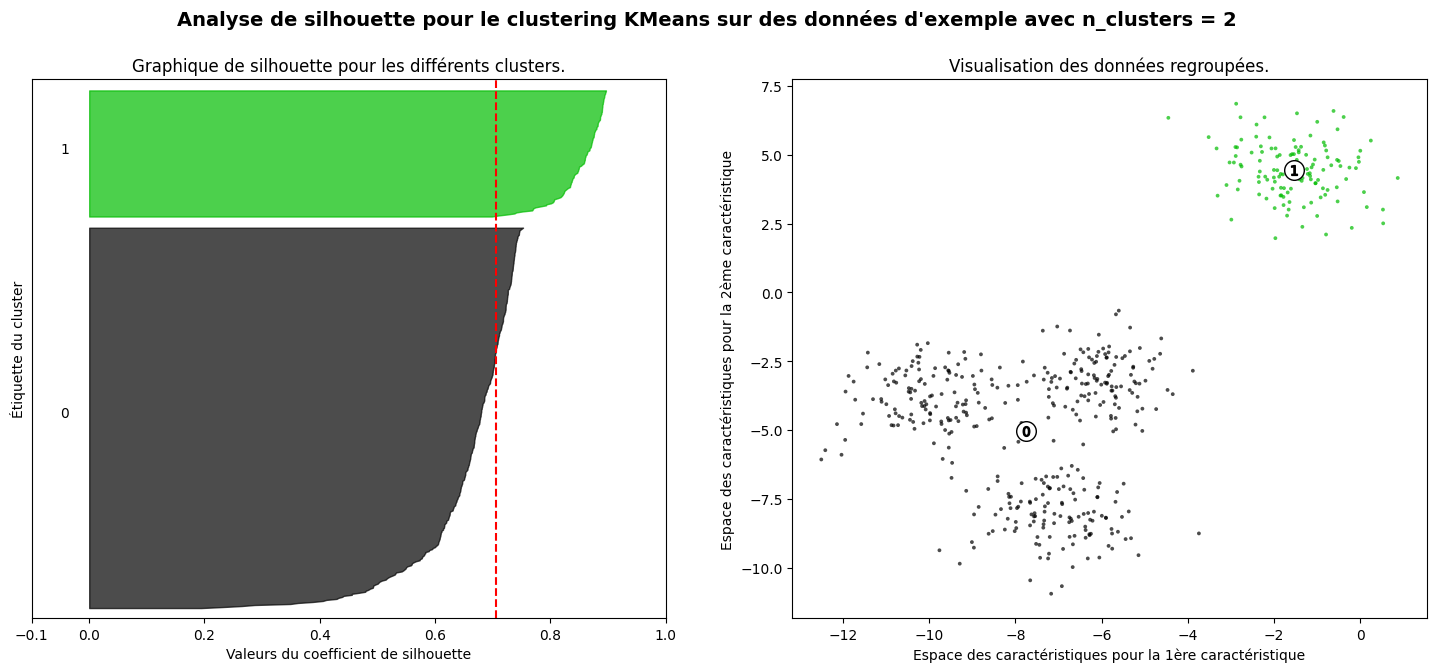

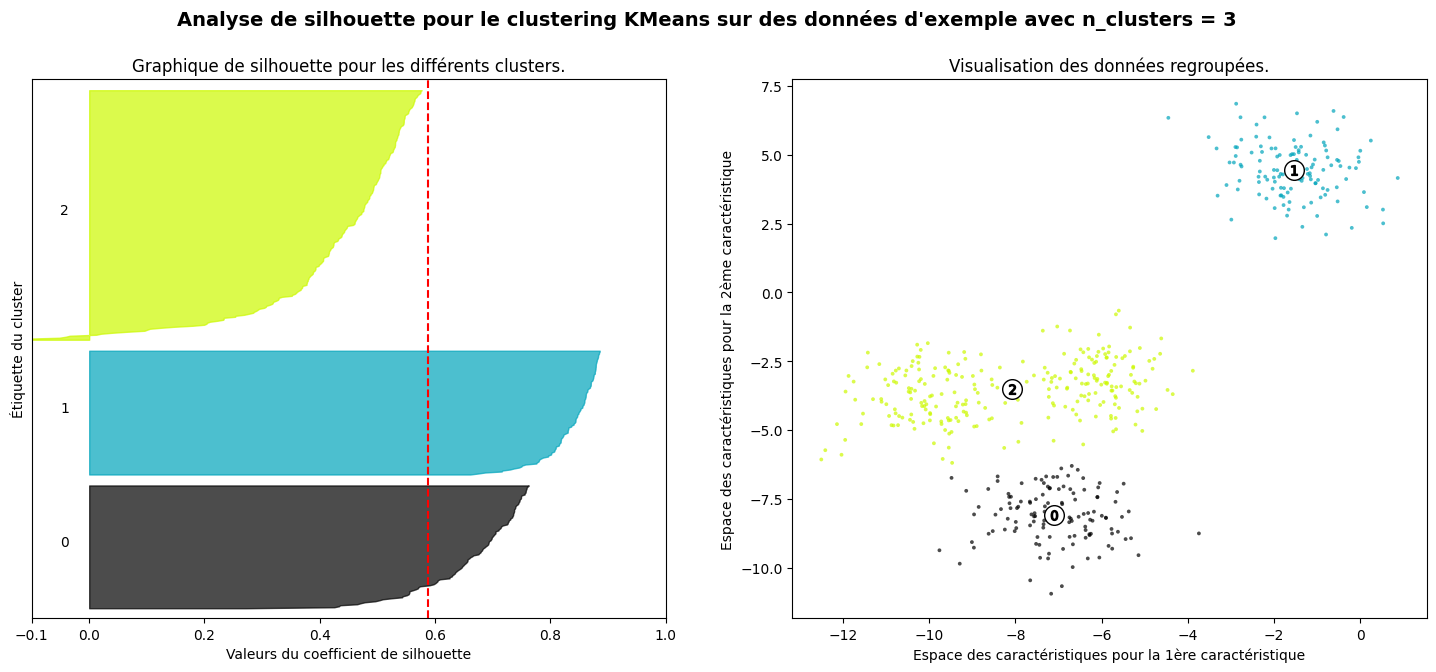

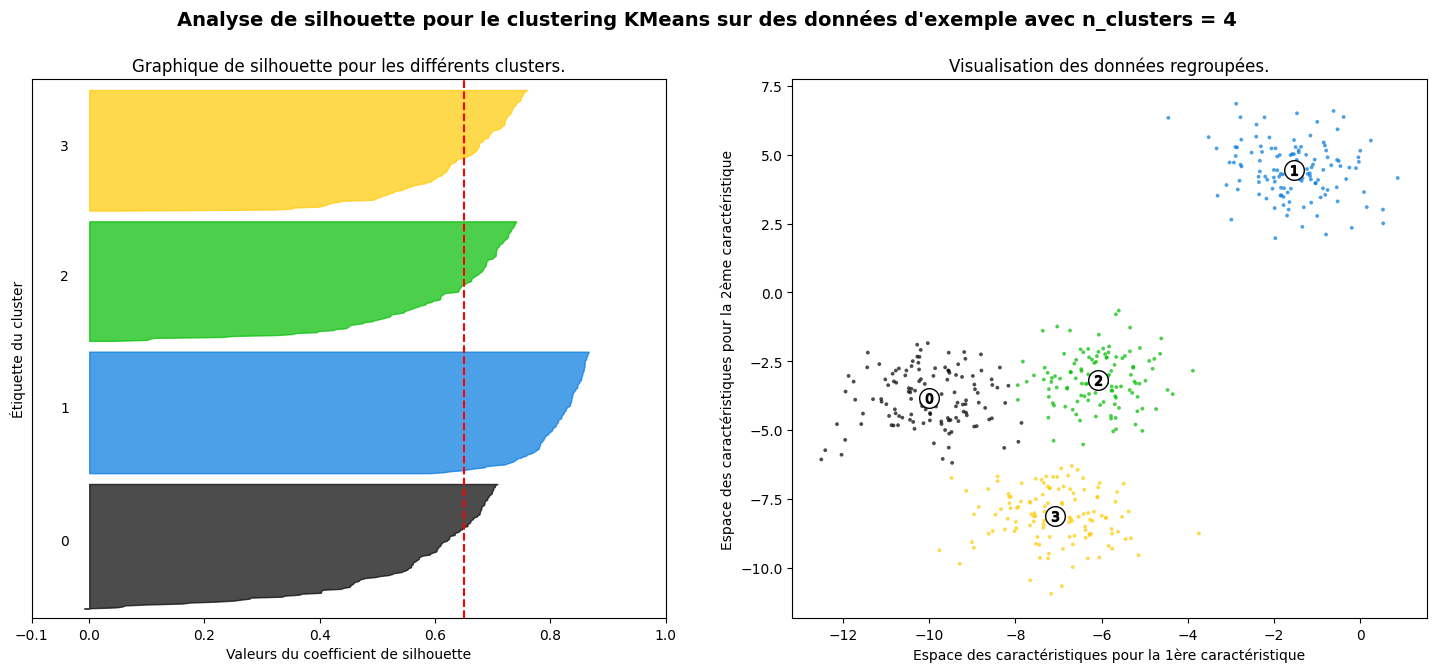

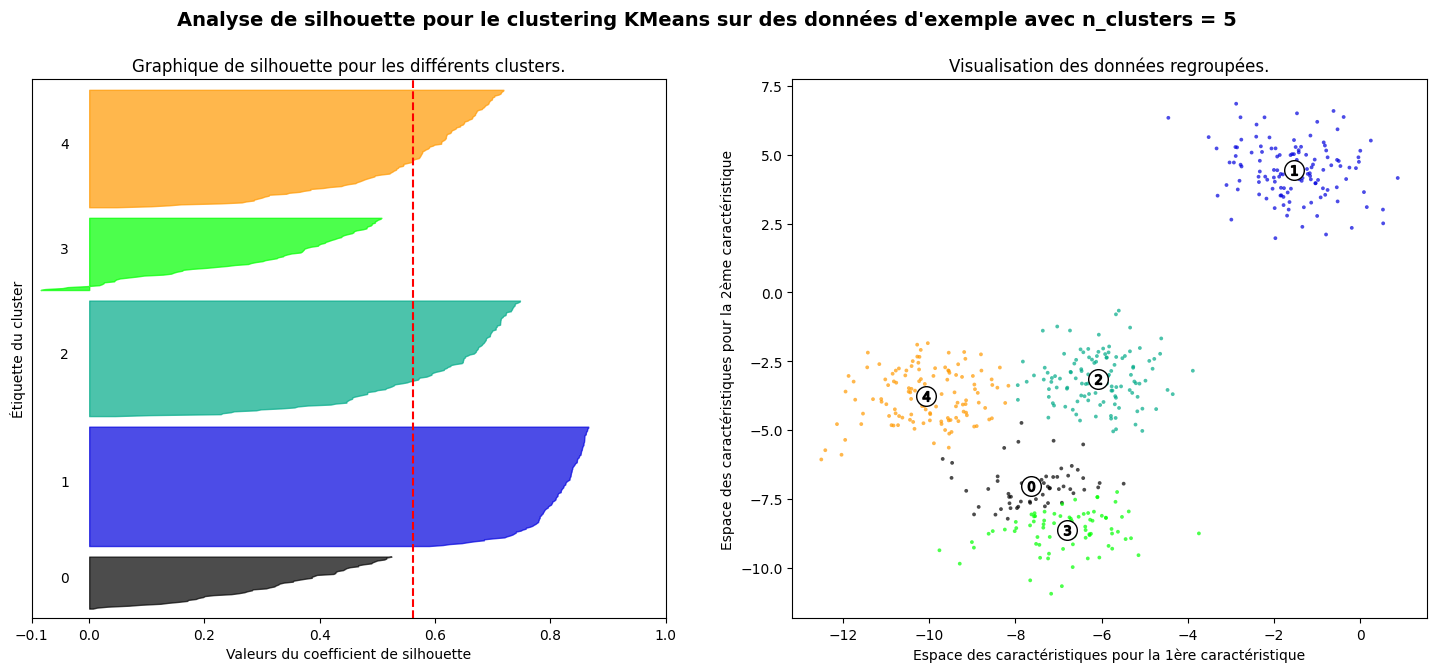

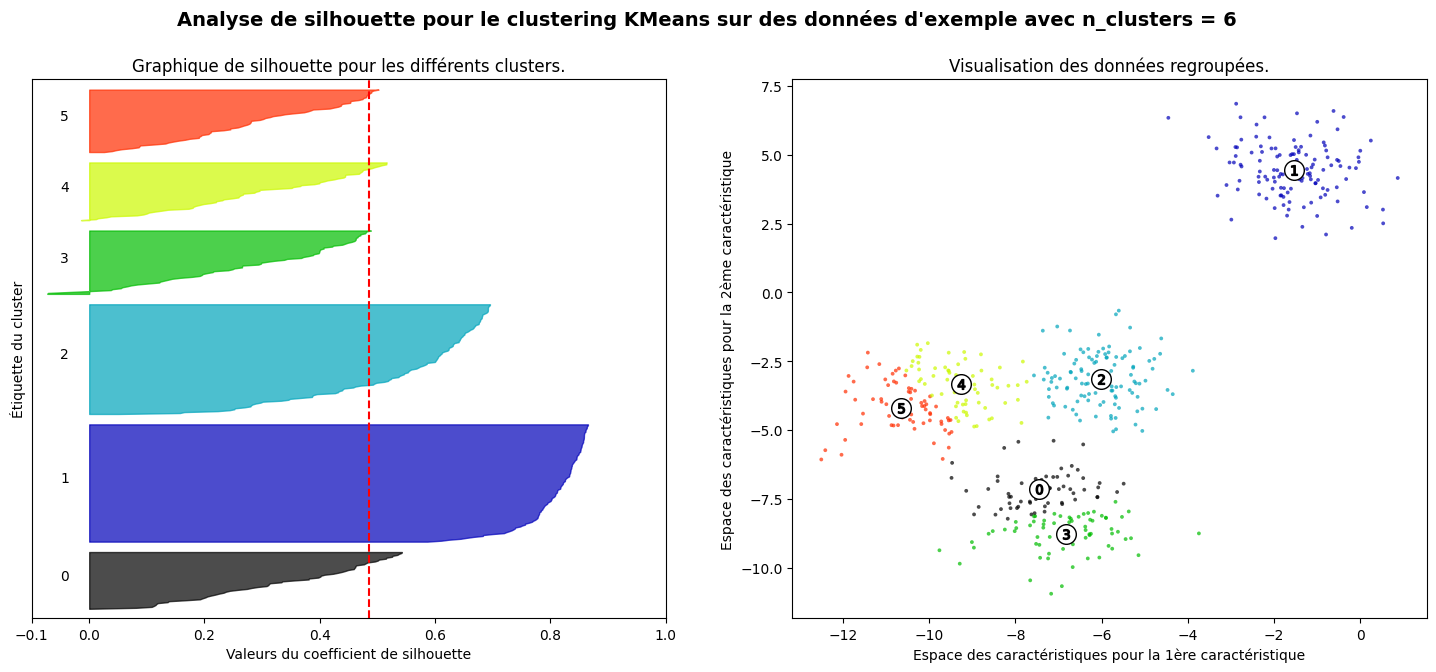

In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.cm as cm  # Pour les cartes de couleurs
import matplotlib.pyplot as plt  # Pour la visualisation
import numpy as np  # Pour les opérations sur les tableaux

from sklearn.cluster import KMeans  # Pour l'algorithme KMeans
from sklearn.datasets import make_blobs  # Pour générer des données d'exemple
from sklearn.metrics import silhouette_samples, silhouette_score  # Pour évaluer les clusters

# Génération des données d'exemple avec make_blobs
# Ce réglage a un cluster distinct et 3 clusters proches
X, y = make_blobs(
    n_samples=500,  # Nombre d'échantillons
    n_features=2,  # Nombre de caractéristiques
    centers=4,  # Nombre de centres de clusters
    cluster_std=1,  # Écart type des clusters
    center_box=(-10.0, 10.0),  # Plage des centres
    shuffle=True,  # Mélanger les échantillons
    random_state=1,  # Pour la reproductibilité
)

# Plage de nombres de clusters à tester
range_n_clusters = [2, 3, 4, 5, 6]

# Boucle sur chaque nombre de clusters
for n_clusters in range_n_clusters:
    # Création d'une figure avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)  # Taille de la figure

    # Premier sous-graphe : graphique de silhouette
    ax1.set_xlim([-0.1, 1])  # Limites de l'axe x
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Limites de l'axe y

    # Initialisation de KMeans avec le nombre de clusters et un état aléatoire
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)  # Prédiction des clusters

    # Calcul du score de silhouette moyen
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Pour n_clusters =",
        n_clusters,
        "Le score de silhouette moyen est :",
        silhouette_avg,
    )

    # Calcul des scores de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10  # Position de départ pour le graphique
    for i in range(n_clusters):
        # Agrégation des scores de silhouette pour le cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()  # Tri des valeurs

        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Taille du cluster
        y_upper = y_lower + size_cluster_i  # Position supérieure pour le graphique

        # Couleur pour le cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Étiquetage des clusters
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Mise à jour de y_lower pour le prochain graphique
        y_lower = y_upper + 10  # 10 pour l'espacement

    ax1.set_title("Graphique de silhouette pour les différents clusters.")
    ax1.set_xlabel("Valeurs du coefficient de silhouette")
    ax1.set_ylabel("Étiquette du cluster")

    # Ligne verticale pour le score de silhouette moyen
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Suppression des étiquettes de l'axe y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # Étiquettes de l'axe x

    # Deuxième sous-graphe : visualisation des clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

        # Récupération des centres des clusters
    centers = clusterer.cluster_centers_

    # Dessin de cercles blancs aux centres des clusters
    ax2.scatter(
        centers[:, 0],  # Coordonnée x des centres
        centers[:, 1],  # Coordonnée y des centres
        marker="o",  # Forme du marqueur
        c="white",  # Couleur blanche
        alpha=1,  # Opacité
        s=200,  # Taille du marqueur
        edgecolor="k",  # Couleur du bord
    )

    # Étiquetage des centres des clusters avec leur numéro
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualisation des données regroupées.")  # Titre du graphique
    ax2.set_xlabel("Espace des caractéristiques pour la 1ère caractéristique")  # Étiquette de l'axe x
    ax2.set_ylabel("Espace des caractéristiques pour la 2ème caractéristique")  # Étiquette de l'axe y

    # Titre général pour l'analyse de silhouette
    plt.suptitle(
        "Analyse de silhouette pour le clustering KMeans sur des données d'exemple avec n_clusters = %d"
        % n_clusters,
        fontsize=14,  # Taille de la police
        fontweight="bold",  # Épaisseur de la police
    )

# Affichage de la figure
plt.show()

- Le meilleur résultat est : n_clusters = 2  car Le score de silhouette moyen est : 0.7049787496083262 est le plus grand. 
- Malgré le fait qu'avec n_clusters = 4 est plus équilibré, il y a un cluster bien trop éloigné, d'ou le fait que 2 sera meilleur
